# KNN for Hand-Writing digit
  我们使用semeion数据集进行实验。Semeion Handwritten Digit 数据集。这个数据集包含了1593个手写数字的位图，并被表示为16x16的位图（总共256个特征）。本次实验拟采用该数据集进行手写字体识别实验，实验方法采取KNN。

  # KNN
  KNN(K Nearest Neighbor)算法是最简单的一种机器学习算法，可用于做分类任务，下面简要介绍一下KNN的一些基础内容。

  假设有一些点在坐标系中，每个点都代表着不同的属性(labels)，在此处可理解为有一些图片在特征空间中，每张图片都代表着一个数字(因为是手写数字)，那么若干张图片共同构成了特征空间，相同的数字所对应的图片其在特征空间上的分布应该是接近的，那么从0-9这十个数字就可以将解空间分割为10个区域，我们后续的任务可以根据新图片所在特征空间的区域判定该图片所对应的数字是多少。

  如果训练集无穷多，那么显然可以将特征空间全部覆盖，但是显然，我们数据集较少，但是其分布仍然符合上述规律，我们计算新图片与原本训练集数据的“距离”来判定其里哪个类比较近。那么我们KNN的算法思路便很清晰：我们考虑遍历训练集中的数据，分别计算其与**待分类的数据**之间的距离，我们选取其中距离最近的K个点，根据这K个点的label投票，决定最终待分类数据的label。其数学过程如下所示：
  
给定一个数据集 $ D $，其中有 $ n $ 个数据点：
$$
D = \{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\}
$$
其中 $ x_i $ 是特征向量，$ y_i $ 是对应的标签。

对于一个新的数据点 $ x $，KNN 算法的目的是找到一个标签 $ y $，使得：
$$
y = \text{argmax}_{c} \sum_{i=1}^{k} \mathbb{I}(y_{(i)} = c)
$$

这里：
- $ y_{(i)} $ 是与 $ x $ 距离第 $ i $ 近的数据点的标签。
- $ \mathbb{I}(.) $ 是指示函数，当括号内的条件为真时，它的值为1，否则为0。
- $ \text{argmax}_{c} $ 表示使括号内的表达式最大化的类别 $ c $。

因此，上述公式简单地表示了：为新数据点 $ x $ 预测的类别 $ y $ 是在其 $ k $ 个最近邻中最常见的类别。




In [1]:
# 引入头文件部分
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from skimage import transform

In [2]:
# load data
with open('/content/drive/MyDrive/ML/semeion.data', 'r') as file:
    lines = file.readlines()
dataset = [list(map(float, line.split())) for line in lines]
images = [row[:256] for row in dataset]
labels = [row[256:] for row in dataset]
images = np.array(images)
labels = np.array(labels)
labels_int = np.argmax(labels, axis=1)
X_train, X_test, y_train, y_test = train_test_split(images, labels_int, test_size=0.2, random_state=42)

print(labels_int)

[0 0 0 ... 9 9 9]


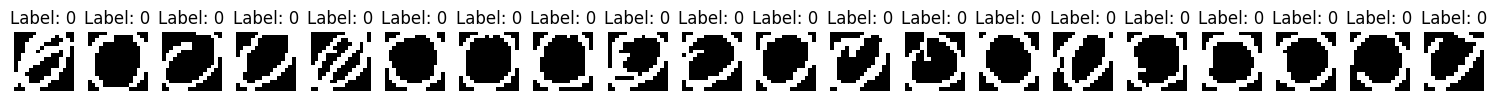

In [ ]:
# Test the data

label_values = np.argmax(labels, axis=1)

num_images_to_show = 20
fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 3))

for i, ax in enumerate(axes):
    ax.imshow(images[i].reshape(16, 16), cmap='gray')
    ax.set_title(f"Label: {label_values[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

# 可能会使用的一些numpy公式:
- np.array() 创建一个numpy数组
- np.sqrt() 计算平方根 对于numpy数组里面所有的数计算平方根
- np.sum() 使用求和 对于括号内的部分求和
- np.argsort($x$) 按照x排序(升序)
- np.argmax($x$) 返回x中最大的元素
- np.bigcount() 统计不同元素出现的次数

In [4]:
# The KNN training
class KNN:
  def __init__(self,k):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predicted(self , X):
    y_pred = [self._predict(x) for x in X]
    return np.array(y_pred)

  def _predict(self , x):
    dist = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
    k_indices = np.argsort(dist)[:self.k]
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    most_common = np.bincount(k_nearest_labels).argmax()
    return most_common

In [ ]:
k = 3
clf = KNN(k=k)
clf.fit(X_train, y_train)
y_pred = clf.predicted(X_test)

# 计算准确度
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 91.54%


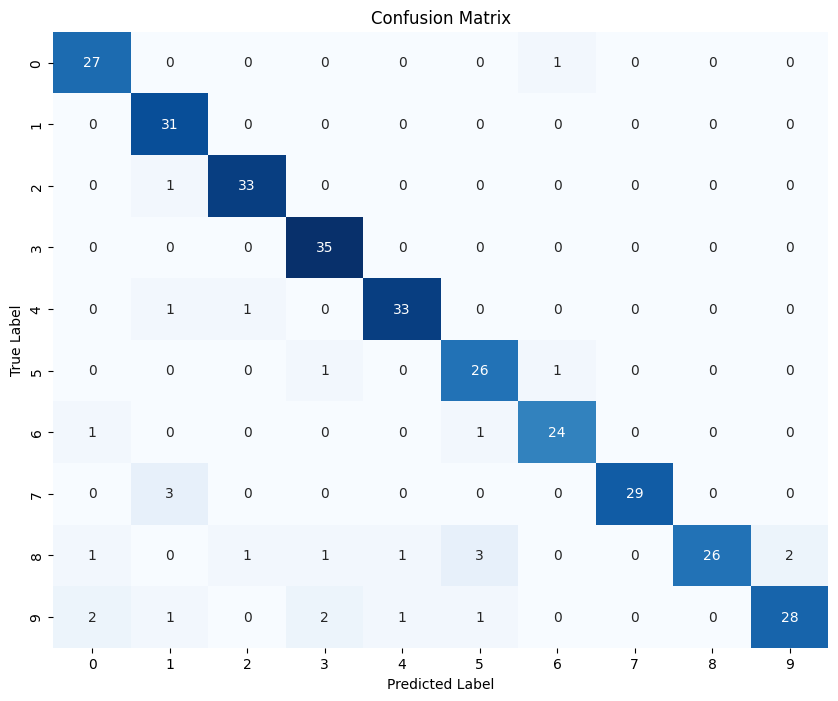

In [ ]:
# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

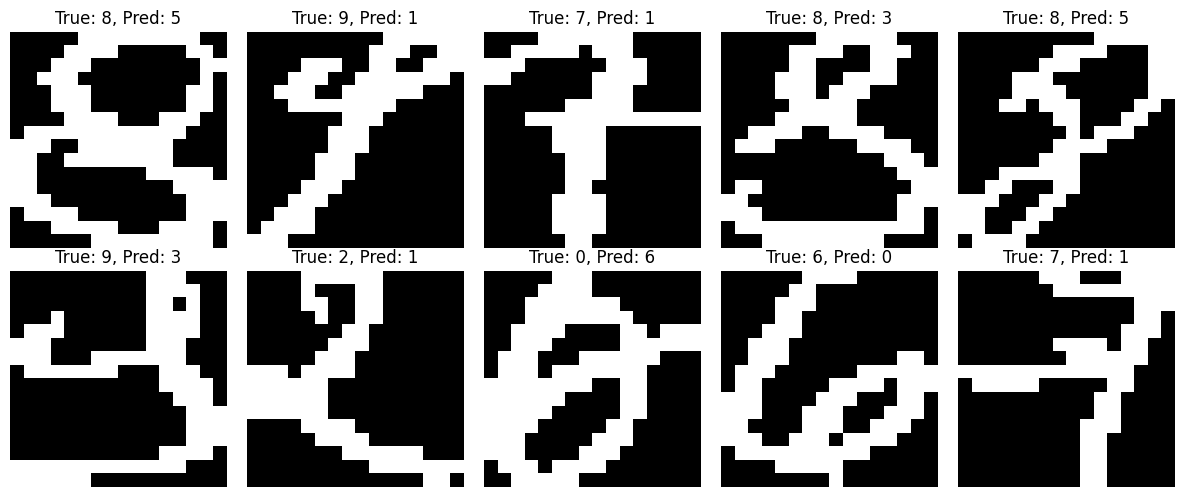

In [ ]:
# 找到错误分类的样本的索引
misclassified_idx = np.where(y_pred != y_test)[0]

# 选择前 10 个错误分类的样本
sample_idx = misclassified_idx[:10]

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X_test[sample_idx[i]].reshape(16, 16), cmap='gray')
    ax.set_title(f"True: {y_test[sample_idx[i]]}, Pred: {y_pred[sample_idx[i]]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


K is : 1
Accuracy: 92.48%
K is : 2
Accuracy: 87.77%
K is : 3
Accuracy: 91.54%
K is : 4
Accuracy: 89.97%
K is : 5
Accuracy: 90.91%
K is : 6
Accuracy: 90.28%
K is : 7
Accuracy: 92.48%
K is : 8
Accuracy: 90.91%
K is : 9
Accuracy: 92.16%
K is : 10
Accuracy: 91.85%
K is : 11
Accuracy: 91.22%
K is : 12
Accuracy: 91.54%
K is : 13
Accuracy: 91.85%
K is : 14
Accuracy: 91.22%
K is : 15
Accuracy: 91.85%


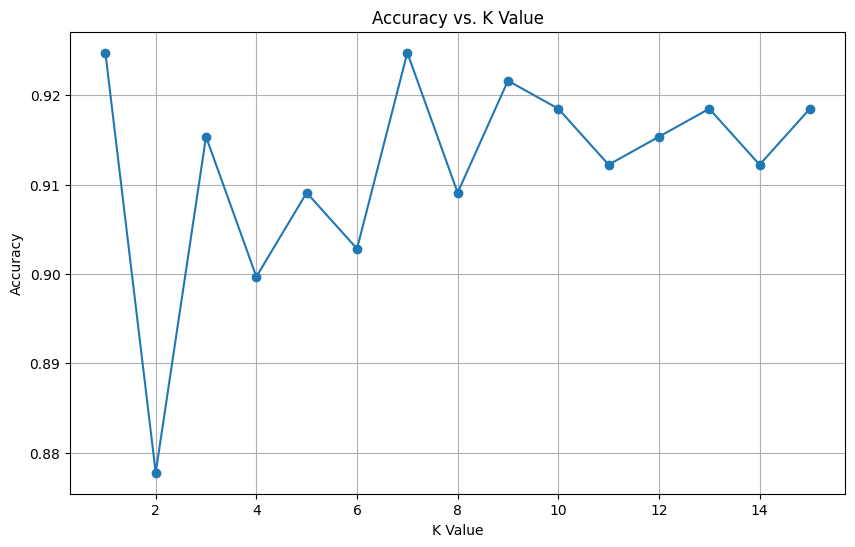

In [ ]:
# 更新K值 查看不同K值情况下准确率并绘制图像
k_values = list(range(1, 16))
acc=[]
for k in k_values:
  clf = KNN(k=k)
  clf.fit(X_train, y_train)
  y_pred = clf.predicted(X_test)
  # 计算准确度
  accuracy = np.mean(y_pred == y_test)
  acc.append(accuracy)
  print("K is :",k)
  print(f"Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(10, 6))
plt.plot(k_values, acc, marker='o', linestyle='-')
plt.title("Accuracy vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# 使用留一法进行交叉验证：

留一法（Leave-One-Out Cross-Validation），简称 LOOCV，其主要思想是将训练集$D(x_1,x_2...x_n)$中的每一个样本作为验证集一次，其他样本作为训练集进行$n$轮迭代，第$i$次训练中选取$x_i$作为验证样本，其余样本作为训练集做训练，其主要适用于较小型数据集，因其需要训练模型$n$次，在我们本次实验的数据集中，只有1500余条数据，故可以使用该方法进行交叉验证。

对于较大型的数据集，我们考虑采用K折交叉验证方法，其是一种用于评估机器学习模型性能的常用技术。它将数据集分成$K$个相似大小的子集，然后进行K次模型训练和评估，每次使用$K-1$个子集进行训练，剩下的一个子集用于验证。这个过程可以帮助我们更可靠地估计模型的性能，减少因数据集分割不同而引入的偶然性。

In [ ]:
# 读取数据
data_loo = pd.read_csv('/content/drive/MyDrive/ML/semeion.data', header=None, delim_whitespace=True)
X_loo = data_loo.iloc[:, :-10].values
y_loo = data_loo.iloc[:, -10:].values.argmax(axis=1)

def loo_cross_validation(X, y, model):
    n = len(X)
    errors = 0

    for i in range(n):
        # 使用除了当前数据点之外的所有点作为训练数据
        X_train = np.delete(X, i, axis=0)
        y_train = np.delete(y, i, axis=0)

        # 使用当前数据点作为测试数据
        X_test = np.array([X[i]])
        y_test = np.array([y[i]])

        # 训练模型并进行预测
        model.fit(X_train, y_train)
        y_pred = model.predicted(X_test)

        # 记录预测错误
        errors += int(y_pred != y_test)

    error_rate = errors / n
    return error_rate

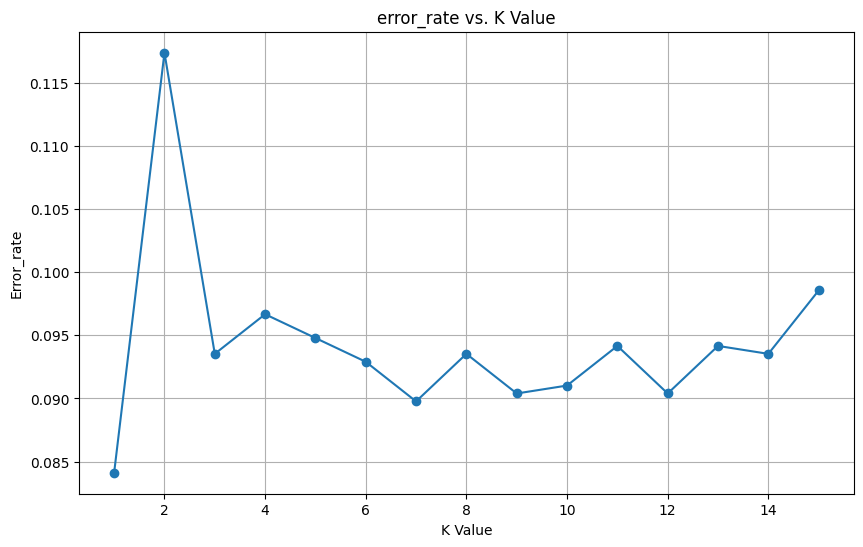

In [ ]:
err = []

for k in k_values:

  knn_loo = KNN(k)
  loo_error_rate = loo_cross_validation(X_loo, y_loo, knn_loo)
  err.append(loo_error_rate)
# 进行留一法评估

plt.figure(figsize=(10, 6))
plt.plot(k_values, err, marker='o', linestyle='-')
plt.title("error_rate vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Error_rate")
plt.grid(True)
plt.show()

# 手写KNN与sklearn包结果对比

在这里我们将手写的KNN与Python中内置的KNN进行对比，在Python中使用sklearn机器学习工具包。

In [ ]:
# 引入库
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

The k is : 1
The acc is : 0.9247648902821317
The k is : 2
The acc is : 0.8714733542319749
The k is : 3
The acc is : 0.9153605015673981
The k is : 4
The acc is : 0.8934169278996865
The k is : 5
The acc is : 0.9184952978056427
The k is : 6
The acc is : 0.9090909090909091
The k is : 7
The acc is : 0.9216300940438872
The k is : 8
The acc is : 0.9059561128526645
The k is : 9
The acc is : 0.9216300940438872
The k is : 10
The acc is : 0.9184952978056427
The k is : 11
The acc is : 0.9122257053291536
The k is : 12
The acc is : 0.9090909090909091
The k is : 13
The acc is : 0.9122257053291536
The k is : 14
The acc is : 0.9122257053291536
The k is : 15
The acc is : 0.9153605015673981


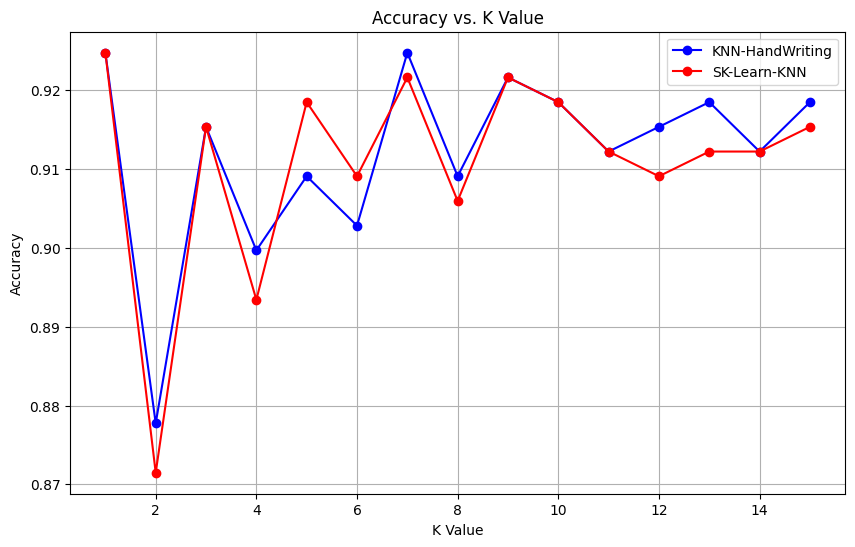

In [ ]:

acc_sklearn = []

for k in k_values:
  knn_sklearn = KNeighborsClassifier(n_neighbors=k)
  knn_sklearn.fit(X_train, y_train)
  y_pred_sklearn = knn_sklearn.predict(X_test)
  accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
  acc_sklearn.append(accuracy_sklearn)
  print("The k is :",k)
  print("The acc is :",accuracy_sklearn)


plt.figure(figsize=(10, 6))
plt.plot(k_values, acc, marker='o', linestyle='-', label='KNN-HandWriting', color='blue')
plt.plot(k_values, acc_sklearn, marker='o', linestyle='-', label='SK-Learn-KNN', color='red')
plt.title("Accuracy vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# 与卷积神经网络(CNN)对比

卷积神经网络的相关知识请参考[这篇博客](https://www.cnblogs.com/Lbmttw/p/16953158.html)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

# 由于 Semeion 数据为 16x16，我们需要调整数据形状以适应 CNN
X_train_cnn = X_train.reshape(-1, 16, 16, 1)
X_test_cnn = X_test.reshape(-1, 16, 16, 1)

# 对标签进行 one-hot 编码
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

# 创建 CNN 模型
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(16, 16, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test_cnn))

# 评估模型
accuracy_cnn = model.evaluate(X_test_cnn, y_test_cnn, verbose=0)[1]
print(f"CNN Accuracy: {accuracy_cnn:.4f}")


Epoch 1/10
40/40 [==============================] - 4s 36ms/step - loss: 1.4480 - accuracy: 0.5950 - val_loss: 0.6740 - val_accuracy: 0.8056
Epoch 2/10
40/40 [==============================] - 1s 15ms/step - loss: 0.4580 - accuracy: 0.8705 - val_loss: 0.3248 - val_accuracy: 0.9154
Epoch 3/10
40/40 [==============================] - 1s 17ms/step - loss: 0.2541 - accuracy: 0.9309 - val_loss: 0.2735 - val_accuracy: 0.9122
Epoch 4/10
40/40 [==============================] - 1s 17ms/step - loss: 0.1822 - accuracy: 0.9482 - val_loss: 0.2285 - val_accuracy: 0.9154
Epoch 5/10
40/40 [==============================] - 1s 17ms/step - loss: 0.1206 - accuracy: 0.9694 - val_loss: 0.2137 - val_accuracy: 0.9342
Epoch 6/10
40/40 [==============================] - 0s 9ms/step - loss: 0.0882 - accuracy: 0.9796 - val_loss: 0.1914 - val_accuracy: 0.9373
Epoch 7/10
40/40 [==============================] - 0s 8ms/step - loss: 0.0578 - accuracy: 0.9898 - val_loss: 0.1939 - val_accuracy: 0.9310
Epoch 8/10
40/4

# 最终结果对比图

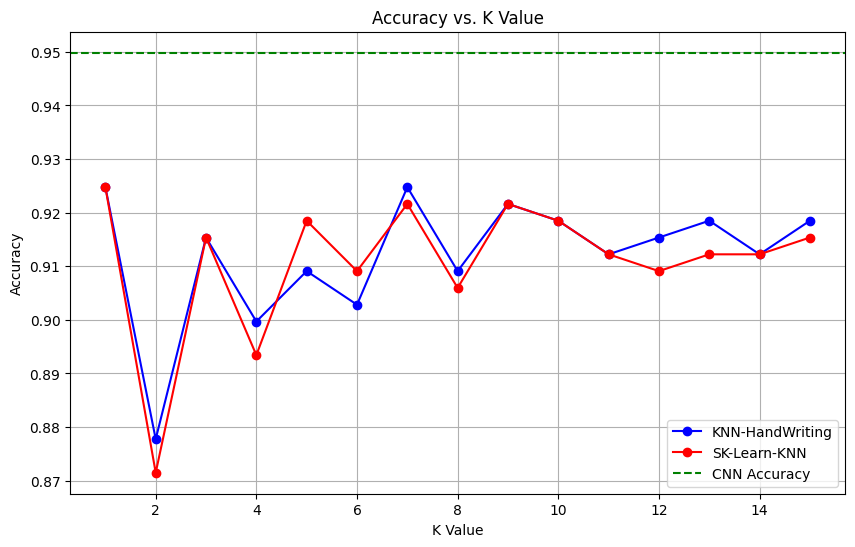

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, acc, marker='o', linestyle='-', label='KNN-HandWriting', color='blue')
plt.plot(k_values, acc_sklearn, marker='o', linestyle='-', label='SK-Learn-KNN', color='red')
plt.axhline(y=accuracy_cnn, color='green', linestyle='--', label='CNN Accuracy')  # 新增的水平线
plt.title("Accuracy vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# 总结

　　本次实验实现了K临近算法(KNN)，同时将手写的KNN与sk-learn中自带的KNN结果进行了对比，我们采取了从1-15不同的超参数进行实验，将结果绘制成了对应的图像，我们可以发现以下几点：

- KNN是一种对参数敏感的算法，采用不同的K值，实验结果也完全不同，在我们的实验中，我们可以发现，当$K=1$，$K=7$时，准确率能够达到最大值。
- 我们手写的KNN计算"距离"是采用L2距离，原始数据为$X：(x_1,x_2,...,x_n)$，假设训练集的数据为$train$，第$i$条数据为$(y_{i,1},y_{i,2}...y_{i,n})$，则该点到$X$的距离为：

$$dist(X,train_i)=\sqrt{\Sigma(x_j-y_{i,j})^2}$$
- 我们显然可以考虑其他的距离，例如欧氏距离等。

- 接下来我们分析实验结果，对于大部分的参数取值，我们可以看到，手写的KNN要比sk-learn中集成的KNN性能更好，我们推测是因为采取的距离计算方法不同，L2距离在该数据集上具有更强的性能。

- 我们在本次实验中还与CNN的结果进行了对比，我们可以看到，卷积神经网络识别的准确率达到了很高的水平，这是因为卷积神经网络可以更好的提取到图像本身的特征，其卷积层和池化层可以有效的识别不同种类的特性，从而达到更好的性能。

# 优化部分

　　我们考虑可以优化KNN，优化的思想借用K-Means聚类的思想：我们考虑将数据映射到其数据空间中，类别和类别之间应该有一个明确的决策边界，我们可以考虑计算每一个类的质心，然后对于新的数据点，我们将其与10个类的质心计算距离，然后考虑将最近的距离所对应的类别作为其判断的类。对于第$i$类，假设有$m$个样本，其质心所对应的样本点为$G$：
$$G(x_1,x_2,...,x_n)$$
$$x_i=\frac{\Sigma y_{i,j}}{m}$$

　　我们在下面实现这种优化方案。

In [ ]:
class NearestCentroidClassifier:
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.centroids_ = {}
        for c in self.classes_:
            self.centroids_[c] = X[y == c].mean(axis=0)

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        distances = {c: np.sqrt(np.sum((x - centroid)**2)) for c, centroid in self.centroids_.items()}
        return min(distances, key=distances.get)

# 创建和训练中心分类器
centroid_classifier = NearestCentroidClassifier()
centroid_classifier.fit(X_train, y_train)

# 预测和评估
y_pred_centroid = centroid_classifier.predict(X_test)
accuracy_centroid = accuracy_score(y_test, y_pred_centroid)

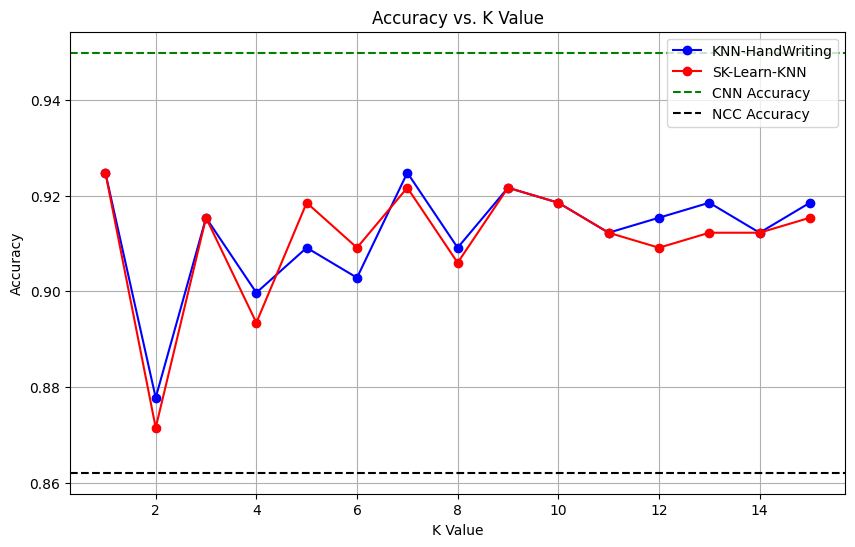

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, acc, marker='o', linestyle='-', label='KNN-HandWriting', color='blue')
plt.plot(k_values, acc_sklearn, marker='o', linestyle='-', label='SK-Learn-KNN', color='red')
plt.axhline(y=accuracy_cnn, color='green', linestyle='--', label='CNN Accuracy')  # 新增的水平线
plt.axhline(y=accuracy_centroid, color='black', linestyle='--', label='NCC Accuracy')  # 新增的水平线
plt.title("Accuracy vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# 结果分析

　　结果显示，这种优化方案其实并不好，我们推测原因：

- 对于每个类别，最近质心分类器只考虑一个点（即质心）来代表该类别。这意味着它忽略了每个类别内部的数据分布。如果一个类别的数据分布是多模态的（即有多个簇），那么单一的质心可能不能很好地代表该类别。

- 质心是通过计算类别中所有点的平均值来得到的。因此，异常值（远离其他数据点的点）可能会显著地移动质心，导致不准确的分类。

- 最近质心分类器假设决策边界是线性的，并且是类别质心之间的中垂线。这可能不适用于许多实际情况，特别是当类别的边界是非线性的或复杂的时。

- 但是其计算资源的需求量要小于KNN算法，因为KNN算法对于每一个预测样本而言，都需要遍历整个数据集来进行预测，假设数据集具有$n$个样本，每个样本具有$m$个属性，共有$k$个类别，那么采取KNN的时间复杂度为：单数据预测为$O(nm)$；若有t个数据需要预测，那么则需要$O(tmn)$的时间复杂度，相对较差；而我们上述提出的方法的时间复杂度为：预处理部分需要计算质心，时间复杂度为$O(mn)$，而之后的预测则为$O(k)$，时间复杂度方面显然优于KNN。

　　接下来我们考虑进行数据增强操作：

In [3]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(images, labels_int, test_size=0.2, random_state=42)


augmented_images = []
augmented_labels = []


for image, label in zip(X_train, y_train):

    augmented_images.append(image)
    augmented_labels.append(label)

    for angle in [90, 180, 270]:
        rotated_image = transform.rotate(image.reshape(16, 16), angle=angle).ravel()
        augmented_images.append(rotated_image)
        augmented_labels.append(label)


X_train_augmented = np.array(augmented_images)
y_train_augmented = np.array(augmented_labels)

K is : 1
Accuracy: 89.66%
K is : 2
Accuracy: 84.64%
K is : 3
Accuracy: 90.91%
K is : 4
Accuracy: 89.03%
K is : 5
Accuracy: 89.97%
K is : 6
Accuracy: 87.77%
K is : 7
Accuracy: 89.34%
K is : 8
Accuracy: 87.77%
K is : 9
Accuracy: 89.03%
K is : 10
Accuracy: 88.71%
K is : 11
Accuracy: 88.40%
K is : 12
Accuracy: 86.83%
K is : 13
Accuracy: 87.46%
K is : 14
Accuracy: 87.15%
K is : 15
Accuracy: 87.15%


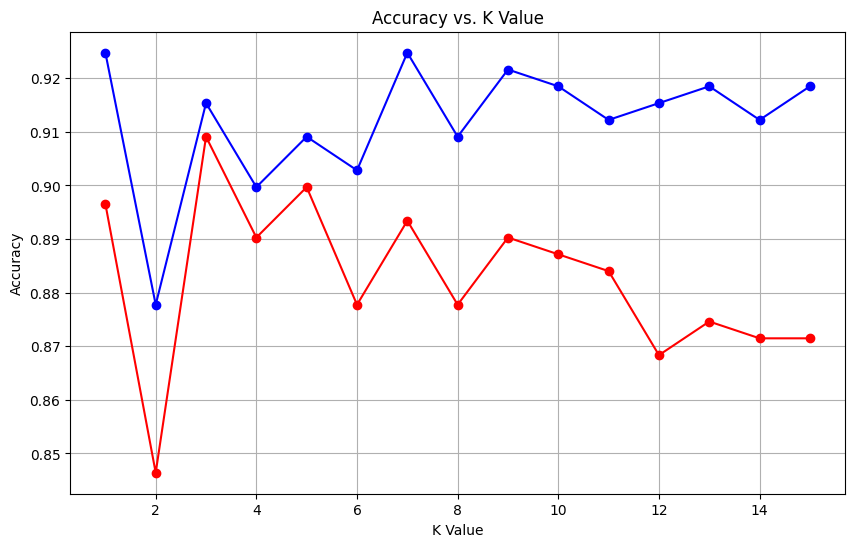

In [7]:
# 更新K值 查看不同K值情况下准确率并绘制图像
k_values = list(range(1, 16))
acc=[]
acc_ori=[]
for k in k_values:
  clf = KNN(k=k)
  clf.fit(X_train_augmented, y_train_augmented)
  y_pred = clf.predicted(X_test)
  # 计算准确度
  accuracy = np.mean(y_pred == y_test)
  acc.append(accuracy)
  print("K is :",k)
  print(f"Accuracy: {accuracy * 100:.2f}%")
  clf.fit(X_train,y_train)
  y_pred = clf.predicted(X_test)
  accuracy = np.mean(y_pred == y_test)
  acc_ori.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, acc, marker='o', linestyle='-',label="Data improved",color="red")
plt.plot(k_values, acc_ori, marker='o', linestyle='-',label="Origin",color="blue")
plt.title("Accuracy vs. K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

数据增强通常用于提高模型的性能，特别是在训练数据有限的情况下。然而，数据增强并不总是导致性能的提高，有时甚至可能导致性能下降。这可能是由于以下几个原因：

1. **过拟合**：
   - 数据增强会增加训练集的大小，如果模型本身就倾向于过拟合，那么在更大的训练集上训练可能会加剧过拟合。

2. **不适当的增强技术**：
   - 并非所有的数据增强技术都适用于所有类型的数据和任务。例如，对于手写数字识别任务，旋转可能不是一个好的选择，因为某些数字（如“6”和“9”）在旋转后会变成其他数字。

3. **KNN的特性**：
   - KNN是一种基于实例的学习算法，它对训练数据中的噪声和异常值非常敏感。数据增强可能会引入一些不一致的样本，这可能会影响KNN的性能。

4. **计算资源限制**：
   - 数据增强会增加训练集的大小，这可能会导致计算资源的需求增加，例如更多的内存和计算时间。在有限的计算资源下，这可能会影响模型的性能。

